In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import time

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
#Measure trainig time
start_time = time.time()

In [5]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\gauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.6868 - loss: 0.8546 - val_accuracy: 0.8410 - val_loss: 0.4469
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8566 - loss: 0.3938 - val_accuracy: 0.8708 - val_loss: 0.3499
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8788 - loss: 0.3288 - val_accuracy: 0.8783 - val_loss: 0.3262
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8925 - loss: 0.2937 - val_accuracy: 0.8823 - val_loss: 0.3144
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9019 - loss: 0.2649 - val_accuracy: 0.8976 - val_loss: 0.2822
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9116 - loss: 0.2432 - val_accuracy: 0.8997 - val_loss: 0.2780
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9174 - loss: 0.2183 - val_accuracy: 0.9022 - val_loss: 0.2674
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9239 - loss: 0.2067 - 

In [8]:
end_time = time.time()
training_time = end_time-start_time
print("Training Time:",training_time,"second")

Training Time: 446.52878522872925 second


In [9]:
#Measure testing time
start_time = time.time()

In [10]:
# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

In [11]:
# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [12]:
# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

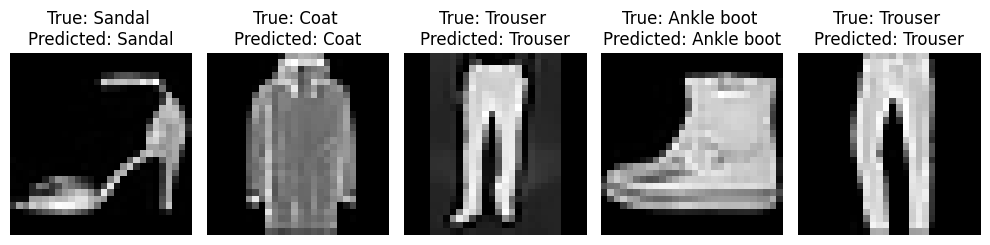

In [13]:
# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
end_time = time.time()
test_time = end_time-start_time
print("Testing Time:",test_time,"second")

Testing Time: 5.350765943527222 second


In [15]:
model.save ('my_cnn_model.h5')

In [16]:
from tensorflow.keras.models import load_model
loaded_model = load_model('my_cnn_model.h5')

In [17]:
loaded_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [18]:
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import ImageTk, Image
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('my_cnn_model.h5')
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def predict_image():
    file_path = filedialog.askopenfilename()
    if not file_path:
        return
    img = Image.open(file_path).convert('L')
    img = img.resize((28,28))
    img = np.array(img)/255.0
    img = img.reshape((1,28,28,1))

    prediction = model.predict(img)
    predicted_label = class_labels[np.argmax(prediction)]

 
    img = Image.open(file_path)
    img = img.resize((200,200))
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image=img
    status_label.config(text=f"Predicted label: {predicted_label}")

root = tk.Tk()
root.title("Fashion MNIST Image Classifier")

upload_button = ttk.Button(root, text="Upload Image", command=predict_image)
upload_button.grid(row=0 , column=0 ,columnspan=3)

image_label = ttk.Label(root)
image_label.grid(row=1 , column=0 ,columnspan=3)

status_label = ttk.Label(root, text="")
status_label.grid(row=2 , column=0 ,columnspan=3)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
